In [1]:
# coding:utf-8

import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import array_to_img, img_to_array, list_pictures, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# フォルダの中にある画像を順次読み込む
# カテゴリーは0から始める

X = []
Y = []

# 対象Aの画像
for picture in list_pictures('./data/train/carot'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    X.append(img)

    Y.append(0)


# 対象Bの画像
for picture in list_pictures('./data/train/onion'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    X.append(img)

    Y.append(1)
    
# 対象Cの画像
for picture in list_pictures('./data/train/potato'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    X.append(img)

    Y.append(2)

# 対象Dの画像
for picture in list_pictures('./data/train/rice'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    X.append(img)

    Y.append(3)

# 対象Eの画像
for picture in list_pictures('./data/train/CurryPowder'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    X.append(img)

    Y.append(4)


# arrayに変換
X = np.asarray(X)
Y = np.asarray(Y)

In [3]:
# 画素値を0から1の範囲に変換
X = X.astype('float32')
X = X / 255.0

# クラスの形式を変換
Y = np_utils.to_categorical(Y, 5)

# 学習用データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=111)

In [9]:
# CNNを構築
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))       # クラスは2個
model.add(Activation('softmax'))

# コンパイル
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

# 実行。出力はなしで設定(verbose=0)。
history = model.fit(X_train, y_train, batch_size=5, epochs=25,
                   validation_data = (X_test, y_test), verbose = 1)



Train on 176 samples, validate on 88 samples
Epoch 1/25

176/176 [==============================] - ETA: 0s - loss: 1.6115 - acc: 0.2045 - val_loss: 1.6059 - val_acc: 0.2045
Epoch 2/25

176/176 [==============================] - ETA: 0s - loss: 1.5978 - acc: 0.2898 - val_loss: 1.6021 - val_acc: 0.2273
Epoch 3/25

140/176 [======================>.......] - ETA: 1s - loss: 1.5910 - acc: 0.2500


176/176 [==============================] - ETA: 0s - loss: 1.5924 - acc: 0.2557 - val_loss: 1.5532 - val_acc: 0.2841
Epoch 4/25

176/176 [==============================] - ETA: 0s - loss: 1.5465 - acc: 0.2727 - val_loss: 1.6326 - val_acc: 0.2386
Epoch 5/25

176/176 [==============================] - ETA: 0s - loss: 1.5305 - acc: 0.3352 - val_loss: 1.6993 - val_acc: 0.2273
Epoch 6/25

100/176 [================>.............] - ETA: 3s - loss: 1.5200 - acc: 0.3300


176/176 [==============================] - ETA: 0s - loss: 1.5067 - acc: 0.3466 - val_loss: 1.5767 - val_acc: 0.2614
Epoch 7/25

176/176 [==============================] - ETA: 0s - loss: 1.3861 - acc: 0.4489 - val_loss: 1.6671 - val_acc: 0.2273
Epoch 8/25

176/176 [==============================] - ETA: 0s - loss: 1.4179 - acc: 0.3807 - val_loss: 1.3690 - val_acc: 0.4773
Epoch 9/25

 60/176 [=========>....................] - ETA: 4s - loss: 1.3488 - acc: 0.4333


176/176 [==============================] - ETA: 0s - loss: 1.3504 - acc: 0.4261 - val_loss: 1.3393 - val_acc: 0.4318
Epoch 10/25

176/176 [==============================] - ETA: 0s - loss: 1.3083 - acc: 0.4545 - val_loss: 1.3683 - val_acc: 0.4205
Epoch 11/25

176/176 [==============================] - ETA: 0s - loss: 1.3129 - acc: 0.4659 - val_loss: 1.6904 - val_acc: 0.1477
Epoch 12/25

 20/176 [==>...........................] - ETA: 6s - loss: 1.5795 - acc: 0.3000


176/176 [==============================] - ETA: 0s - loss: 1.2529 - acc: 0.4886 - val_loss: 1.3740 - val_acc: 0.4205
Epoch 13/25

176/176 [==============================] - ETA: 0s - loss: 1.2348 - acc: 0.5114 - val_loss: 1.3204 - val_acc: 0.4091
Epoch 14/25

165/176 [===========================>..] - ETA: 0s - loss: 1.1785 - acc: 0.5697


176/176 [==============================] - ETA: 0s - loss: 1.1702 - acc: 0.5682 - val_loss: 1.8213 - val_acc: 0.3750
Epoch 15/25

176/176 [==============================] - ETA: 0s - loss: 1.1798 - acc: 0.5227 - val_loss: 1.4244 - val_acc: 0.3409
Epoch 16/25

176/176 [==============================] - ETA: 0s - loss: 1.1290 - acc: 0.5398 - val_loss: 1.3921 - val_acc: 0.3977
Epoch 17/25

125/176 [====================>.........] - ETA: 2s - loss: 1.1307 - acc: 0.5440


176/176 [==============================] - ETA: 0s - loss: 1.1498 - acc: 0.5511 - val_loss: 1.9975 - val_acc: 0.3295
Epoch 18/25

176/176 [==============================] - ETA: 0s - loss: 1.0935 - acc: 0.5739 - val_loss: 1.2380 - val_acc: 0.5000
Epoch 19/25

176/176 [==============================] - ETA: 0s - loss: 1.0156 - acc: 0.6193 - val_loss: 2.0950 - val_acc: 0.3523
Epoch 20/25

 85/176 [=============>................] - ETA: 3s - loss: 1.0678 - acc: 0.6471


176/176 [==============================] - ETA: 0s - loss: 1.0204 - acc: 0.6534 - val_loss: 1.2382 - val_acc: 0.5114
Epoch 21/25

176/176 [==============================] - ETA: 0s - loss: 0.9593 - acc: 0.6648 - val_loss: 1.5751 - val_acc: 0.4091
Epoch 22/25

176/176 [==============================] - ETA: 0s - loss: 0.9560 - acc: 0.6307 - val_loss: 1.8664 - val_acc: 0.3750
Epoch 23/25

 45/176 [======>.......................] - ETA: 5s - loss: 0.7914 - acc: 0.7778


176/176 [==============================] - ETA: 0s - loss: 0.9276 - acc: 0.6989 - val_loss: 1.1547 - val_acc: 0.5227
Epoch 24/25

176/176 [==============================] - ETA: 0s - loss: 0.8764 - acc: 0.6989 - val_loss: 1.1930 - val_acc: 0.5227
Epoch 25/25

176/176 [==============================] - ETA: 0s - loss: 0.8596 - acc: 0.7102 - val_loss: 1.1718 - val_acc: 0.5455


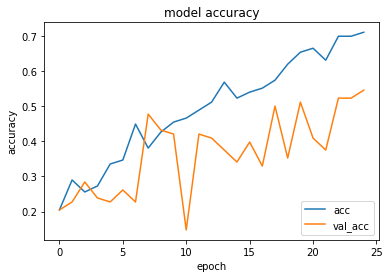

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='lower right') #グラフの凡例を用意している
plt.show()

In [11]:
# テストデータに適用
predict_classes = model.predict_classes(X_test)

# マージ。yのデータは元に戻す
mg_df = pd.DataFrame({'predict': predict_classes, 'class': np.argmax(y_test, axis=1)})

# confusion matrix
pd.crosstab(mg_df['class'], mg_df['predict'])


88/88 [==============================] - ETA: 0s


predict,0,1,2,3,4
class,,,,,
0,10,7,2,2,4
1,1,8,0,3,2
2,0,6,9,0,3
3,1,4,0,12,1
4,1,0,3,0,9


In [12]:
def train_and_evaluate_model(model,data,labels,data_test,labels_test):
# def train_and_evaluate_model(model, data[train], labels[train], data[test], labels[test]):
    model.fit(data, labels, batch_size=32, epochs=30,verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation
    return model.evaluate(data_test, labels_test, verbose=1)  # Evaluate the trained model on the test set!
#損失値と評価の値を算出している
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import StratifiedKFold
# kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)
# print(cross_val_score(model, image_list, label_list,cv=kfold)).mean()  
from sklearn.cross_validation import StratifiedKFold
label = np.r_[np.repeat(0,8), np.repeat(1,8)]
skf = StratifiedKFold(label, n_folds=5, shuffle=True)
total_score = 0
rep = 0
print("success")
for i, (train, test) in enumerate(skf):
    print("TRAIN:", train, "TEST:", test)
    total_score += train_and_evaluate_model(model, X_train[train], y_train[train], X_train[test], y_train[test])[1]
    rep+=1
print(total_score/rep)

success
TRAIN: [ 0  2  3  4  5  7  8  9 11 12 13 15] TEST: [ 1  6 10 14]
Train on 10 samples, validate on 2 samples
Epoch 1/30

10/10 [==============================] - ETA: 0s - loss: 1.2511 - acc: 0.5000 - val_loss: 0.9428 - val_acc: 0.5000
Epoch 2/30

10/10 [==============================] - ETA: 0s - loss: 1.0285 - acc: 0.8000 - val_loss: 0.9959 - val_acc: 0.5000
Epoch 3/30

10/10 [==============================] - ETA: 0s - loss: 0.9754 - acc: 0.7000 - val_loss: 0.9819 - val_acc: 0.5000
Epoch 4/30

10/10 [==============================] - ETA: 0s - loss: 0.8296 - acc: 0.8000 - val_loss: 1.0313 - val_acc: 0.5000
Epoch 5/30

10/10 [==============================] - ETA: 0s - loss: 0.7397 - acc: 0.8000 - val_loss: 1.4015 - val_acc: 0.5000
Epoch 6/30

10/10 [==============================] - ETA: 0s - loss: 0.5632 - acc: 0.8000 - val_loss: 1.9642 - val_acc: 0.5000
Epoch 7/30

10/10 [==============================] - ETA: 0s - loss: 0.5670 - acc: 0.8000 - val_loss: 2.2889 - val_acc: 0.

Epoch 2/30

10/10 [==============================] - ETA: 0s - loss: 0.2019 - acc: 1.0000 - val_loss: 2.1609 - val_acc: 0.5000
Epoch 3/30

10/10 [==============================] - ETA: 0s - loss: 0.3466 - acc: 0.8000 - val_loss: 1.1636 - val_acc: 0.5000
Epoch 4/30

10/10 [==============================] - ETA: 0s - loss: 0.3031 - acc: 0.8000 - val_loss: 1.8423 - val_acc: 0.5000
Epoch 5/30

10/10 [==============================] - ETA: 0s - loss: 0.2867 - acc: 0.9000 - val_loss: 1.9151 - val_acc: 0.5000
Epoch 6/30

10/10 [==============================] - ETA: 0s - loss: 0.1327 - acc: 1.0000 - val_loss: 2.0114 - val_acc: 0.5000
Epoch 7/30

10/10 [==============================] - ETA: 0s - loss: 0.1434 - acc: 0.9000 - val_loss: 1.9290 - val_acc: 0.5000
Epoch 8/30

10/10 [==============================] - ETA: 0s - loss: 0.0580 - acc: 1.0000 - val_loss: 1.8532 - val_acc: 0.5000
Epoch 9/30

10/10 [==============================] - ETA: 0s - loss: 0.1075 - acc: 1.0000 - val_loss: 1.9721 - 

Epoch 4/30

12/12 [==============================] - ETA: 0s - loss: 0.0386 - acc: 1.0000 - val_loss: 1.6088 - val_acc: 0.5000
Epoch 5/30

12/12 [==============================] - ETA: 0s - loss: 0.0306 - acc: 1.0000 - val_loss: 1.5992 - val_acc: 0.5000
Epoch 6/30

12/12 [==============================] - ETA: 0s - loss: 0.0433 - acc: 1.0000 - val_loss: 2.1157 - val_acc: 0.5000
Epoch 7/30

12/12 [==============================] - ETA: 0s - loss: 0.0965 - acc: 1.0000 - val_loss: 2.2827 - val_acc: 0.5000
Epoch 8/30

12/12 [==============================] - ETA: 0s - loss: 0.1055 - acc: 1.0000 - val_loss: 2.1237 - val_acc: 0.5000
Epoch 9/30

12/12 [==============================] - ETA: 0s - loss: 0.1011 - acc: 1.0000 - val_loss: 1.4818 - val_acc: 0.5000
Epoch 10/30

12/12 [==============================] - ETA: 0s - loss: 0.0260 - acc: 1.0000 - val_loss: 1.5880 - val_acc: 0.5000
Epoch 11/30

12/12 [==============================] - ETA: 0s - loss: 0.0877 - acc: 0.9167 - val_loss: 1.2040 